In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/home/olle/PycharmProjects/orderbookrl


# Adjusted reward

It is better to increase capital when you have a lot of it.

$ r_t = (cap_t - cap_{t-1})/cap_t * (cap_t/cap_0) $

In [90]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

In [3]:
agent_id = 'PPO'
path = 'logs/marketorderenvadjusted/ppo/PPO_MarketOrderEnvAdjustment-v0_0_2018-08-25_13-17-26p0_z43cl/'
checkpoint = 160

env, agent = load_env_agent(agent_id, path, checkpoint)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:21673 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:54665 to respond...
Starting local scheduler with the following resources: {'CPU': 4, 'GPU': 1}.

View the web UI at http://localhost:8888/notebooks/ray_ui54012.ipynb?token=7b9afc042aef006a6ed8b1d03157cfb686ba5e60dcff5716



Created LogSyncer for /home/olle/ray_results/2018-08-26_10-08-28gc0g1ct_ -> None
Using custom preprocessor mv


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-03-24T20:09:42.313000Z
2018-03-25T05:09:15.083000Z
2018-03-25T14:49:53.508000Z
2018-03-25T22:44:16.242000Z
2018-03-26T08:19:01.299000Z
2018-03-26T14:12:17.678000Z
2018-03-26T19:36:08.846000Z
2018-03-26T23:12:06.069000Z
2018-03-27T04:31:05.917000Z
2018-03-27T11:30:37.498000Z
2018-03-27T20:20:28.508000Z
2018-03-28T04:33:23.812000Z
2018-03-28T15:25:34.833000Z
2018-03-29T01:47:35.435000Z
2018-03-29T08:19:22.206000Z
2018-03-29T13:28:04.363000Z
2018-03-29T19:06:02.021000Z
2018-03-29T22:26:05.707000Z
2018-03-30T01:20:27.858000Z
2018-03-30T05:29:31.915000Z
2018-03-30T09:07:25.962000Z
2018-03-30T12:48:48.247000Z
2018-03-30T16:43:50.359000Z
2018-03-30T21:29:06.973000Z
2018-03-31T03:00:09.414000Z
2018-03-31T10:31:41.069000Z
2018-03-31T17:06:21.631000Z
2018-04-01T02:16:03.828000Z
2018-04-01T10:52:44.325000Z
2018-04-01T16:12:29.267000Z
2018-04-01T20:27:52.509000Z
2018-04-02T04:10:06.846000Z
2018-04-02T13:58:12.713000Z
2018-04-02T22:35:52.700000Z
2018-04-03T06:25:38.410000Z
2018-04-03T15:57:43.

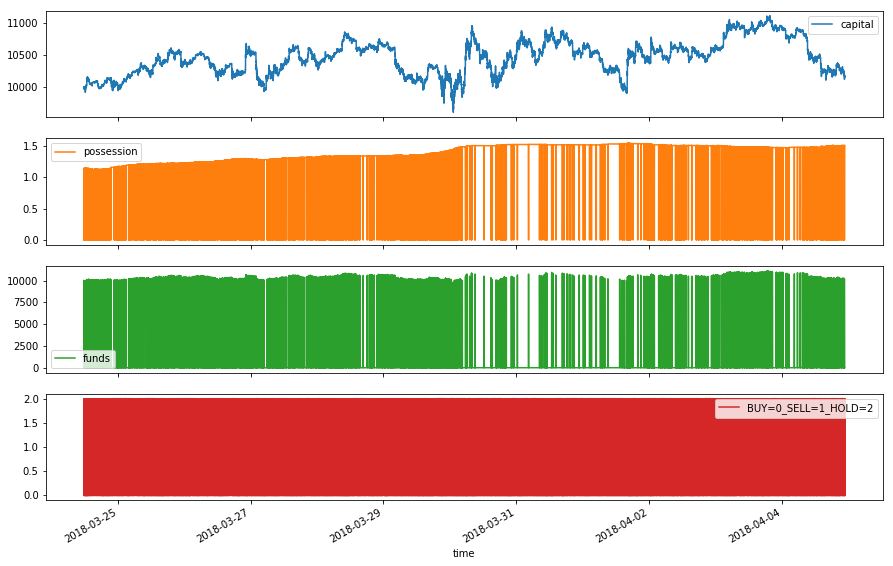

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

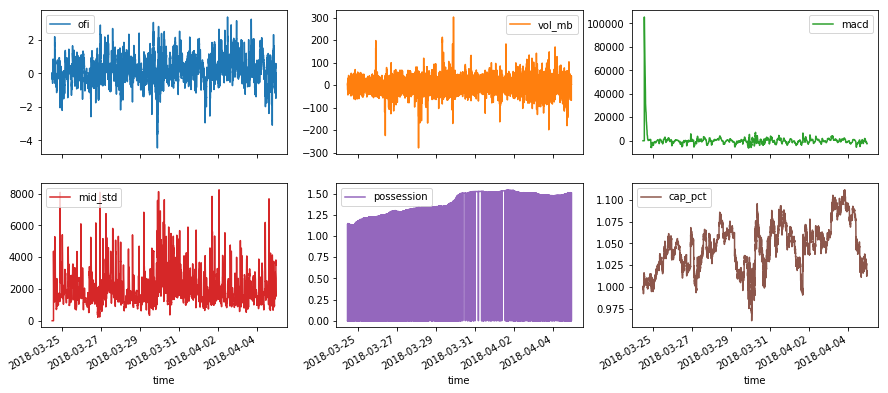

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession', 'cap_pct']
states.plot(subplots=True, figsize=(15,10), layout=layout);

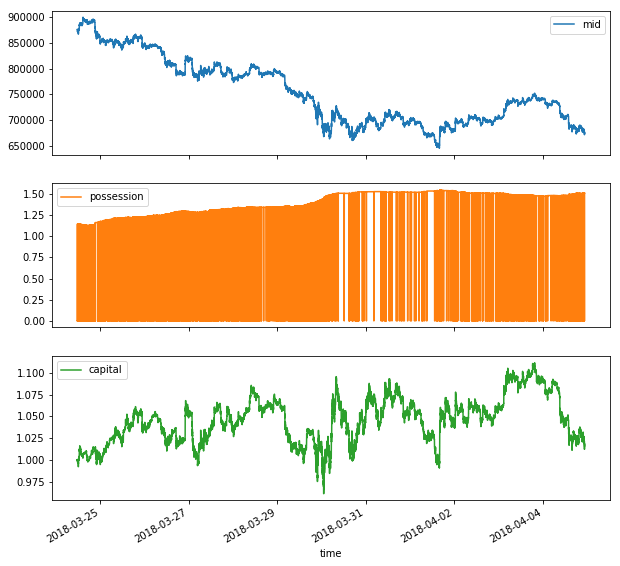

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

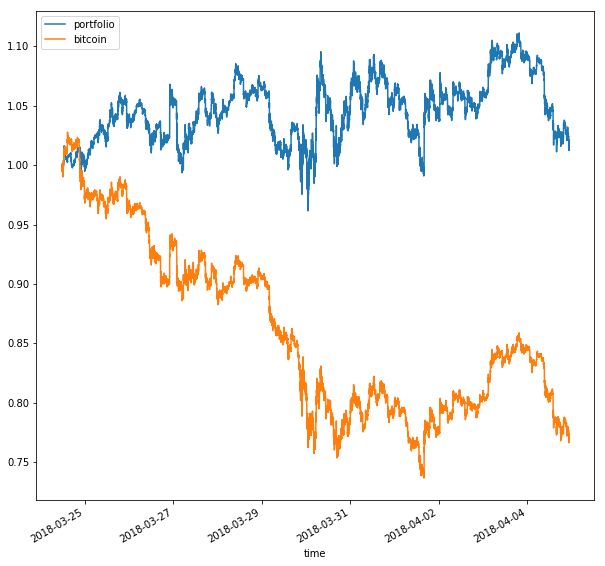

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

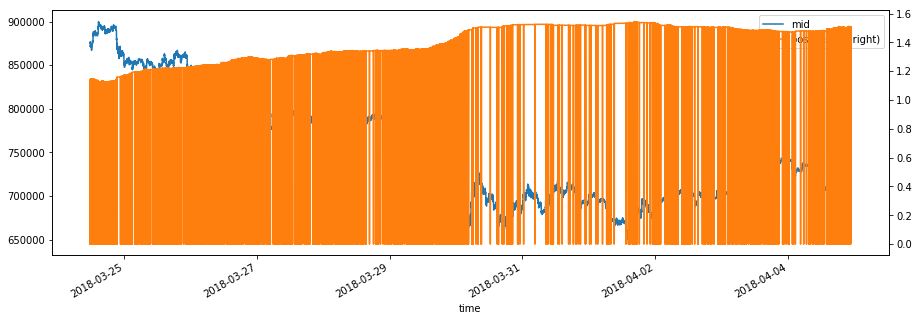

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

In [92]:
daily_returns = (port_cum_ret - 1).resample('D').last()
daily_returns.index = pd.to_datetime(daily_returns.index.astype(str))

In [93]:
daily_returns.head()

time
2018-03-24    0.001390
2018-03-25    0.037566
2018-03-26    0.051101
2018-03-27    0.035747
2018-03-28    0.066705
Name: portfolio, dtype: float64

In [94]:
pf_trades = trades.copy(deep=True)
pf_trades.loc[pf_trades.buy_sell == 1, 'size'] = -pf_trades.loc[pf_trades.buy_sell == 1, 'size']
pf_trades.index = pd.to_datetime(pf_trades.index)
pf_trades = pf_trades.rename(columns={'size': 'amount'})
pf_trades['symbol'] = 'BTC/USD'
pf_trades.head(n=15)

,amount,price,buy_sell,symbol
time,,,,
2018-03-24 11:40:05.655,0.700352,875634,0,BTC/USD
2018-03-24 11:40:05.655,0.001750,875634,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875643,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875644,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875644,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875644,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875644,0,BTC/USD
2018-03-24 11:40:05.655,0.001000,875644,0,BTC/USD
2018-03-24 11:40:05.655,0.100000,875700,0,BTC/USD
